In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import AgglomerativeClustering
from kmodes.kmodes import KModes

import plotly.express as px

pd.set_option('mode.chained_assignment', None)

In [2]:
original_dataset_labels = pd.read_csv(r'../../../Data/Survey/cleaned_334_edited.csv')
original_dataset_labels

age  gender       monthly_income tertiary_student instituition  \
0    22 - 25  Female           Below $500              Yes          SMU   
1    22 - 25  Female           Below $500              Yes          SMU   
2    22 - 25    Male           Below $500              Yes          SIT   
3    18 - 21  Female           Below $500              Yes          SMU   
4    22 - 25  Female    Prefer not to say              Yes          SIM   
..       ...     ...                  ...              ...          ...   
329  22 - 25  Female           Below $500              Yes          SMU   
330  18 - 21  Female    Prefer not to say              Yes          SMU   
331  22 - 25    Male        $501 - $1,000              Yes          NUS   
332  22 - 25  Female  $1,001 - $2,000\r\n              Yes          NUS   
333  18 - 21  Female           Below $500              Yes          NTU   

         region           location    type_of_student  type_of_employment  \
0         North             Yishun  Full-time Student        Not employed   
1          West        Bukit Batok  Full-time Student  Employed Part-time   
2          West        Bukit Batok  Full-time Student        Not employed   
3          East           Tampines  Full-time Student        Not employed   
4          East  Prefer not to say  Full-time Student        Not employed   
..          ...                ...                ...                 ...   
329     Central        Bukit Timah  Full-time Student        Not employed   
330     Central      Marine Parade  Full-time Student        Not employed   
331  North-East            Hougang  Full-time Student        Not employed   
332        East           Tampines  Full-time Student  Employed Part-time   
333  North-East         Ang Mo Kio  Full-time Student        Not employed   

                       frequently_used_mot  ...   accessibility_cdg  \
0                                 MRT, Bus  ...  Somewhat satisfied   
1    Bus, MRT, Taxi, Ride-hailing services  ...             Neutral   
2          Bus, MRT, Ride-hailing services  ...  Somewhat satisfied   
3                                 Bus, MRT  ...  Somewhat satisfied   
4                                 MRT, Bus  ...             Neutral   
..                                     ...  ...                 ...   
329                               Bus, MRT  ...  Somewhat satisfied   
330        Bus, MRT, Ride-hailing services  ...  Somewhat satisfied   
331                               Bus, MRT  ...  Somewhat satisfied   
332                                    MRT  ...  Somewhat satisfied   
333        Bus, MRT, Ride-hailing services  ...  Somewhat satisfied   

                    cs_cdg               cost_cdg         comfort_cdg  \
0                  Neutral  Somewhat dissatisfied  Somewhat satisfied   
1    Somewhat dissatisfied  Somewhat dissatisfied  Somewhat satisfied   
2       Somewhat satisfied                Neutral  Somewhat satisfied   
3       Somewhat satisfied     Somewhat satisfied  Somewhat satisfied   
4                  Neutral                Neutral             Neutral   
..                     ...                    ...                 ...   
329     Somewhat satisfied     Somewhat satisfied  Somewhat satisfied   
330     Somewhat satisfied     Somewhat satisfied  Somewhat satisfied   
331     Somewhat satisfied     Somewhat satisfied  Somewhat satisfied   
332     Somewhat satisfied                Neutral  Somewhat satisfied   
333     Somewhat satisfied     Somewhat satisfied  Somewhat satisfied   

        reliability_cdg            info_cdg  overall_rating_cdg  \
0    Somewhat satisfied             Neutral             Neutral   
1    Somewhat satisfied  Somewhat satisfied             Neutral   
2        Very satisfied  Somewhat satisfied  Somewhat satisfied   
3    Somewhat satisfied  Somewhat satisfied  Somewhat satisfied   
4               Neutral             Neutral             Neutral   
..                  ...                 ...        

In [3]:
perception = pd.read_csv(r'../../../Data/Survey/perception_dataset.csv')
perception

age  gender  monthly_income  instituition  region  location  \
0      1       0               4            17       2        38   
1      1       0               4            17       4         3   
2      1       1               4            16       4         3   
3      0       0               4            17       1        30   
4      1       0               5            15       1        21   
..   ...     ...             ...           ...     ...       ...   
329    1       0               4            17       0         6   
330    0       0               5            17       0        16   
331    1       1               2             9       3        11   
332    1       0               0             9       1        30   
333    0       0               4             8       3         0   

     type_of_student  type_of_employment  convenient_rental_car  \
0                  0                   2                      0   
1                  0                   1                      1   
2                  0                   2                      0   
3                  0                   2                      0   
4                  0                   2                      0   
..               ...                 ...                    ...   
329                0                   2                      0   
330                0                   2                      0   
331                0                   2                      2   
332                0                   1                      0   
333                0                   2                      0   

     difficulties_rental_car  ...  safe_mrt  reason_taxi_comfort_of_privacy  \
0                          0  ...         1                               0   
1                          1  ...         1                               0   
2                          0  ...         1                               0   
3                          0  ...         1                               0   
4                          0  ...         0                               0   
..                       ...  ...       ...                             ...   
329                        0  ...         0                               0   
330                        0  ...         1                               1   
331                        1  ...         0                               0   
332                        0  ...         1                               0   
333                        0  ...         1                               0   

     reason_ride_hailing_ comfort_of_privacy  reason_ride_hailing_promotion  \
0                                          0                              1   
1                                          0                              1   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   
..                                       ...                            ...   
329                                        0                              1   
330                                        1                              1   
331                                        0                              1   
332                                        0                              1   
333                                        0                              0   

     reason_taxi_promotion  customer_service_taxi  \
0                        1                      0   
1                        1                      1   
2                        0                      1   
3                        1                      2   
4                        0                      0   
..                     ...                    ...   
329                      1                      0   
330                      0                      0   
331     

In [4]:
original_dataset_labels.groupby('region').count()

age  gender  monthly_income  tertiary_student  instituition  \
region                                                                    
Central      71      71              71                71            71   
East         62      62              62                62            62   
North        53      53              53                53            53   
North-East   59      59              59                59            59   
West         89      89              89                89            89   

            location  type_of_student  type_of_employment  \
region                                                      
Central           71               71                  71   
East              62               62                  62   
North             53               53                  53   
North-East        59               59                  59   
West              89               89                  89   

            frequently_used_mot  frequency_mot  ...  accessibility_cdg  \
region                                          ...                      
Central                      71             71  ...                 71   
East                         62             62  ...                 62   
North                        53             53  ...                 53   
North-East                   59             59  ...                 59   
West                         89             89  ...                 89   

            cs_cdg  cost_cdg  comfort_cdg  reliability_cdg  info_cdg  \
region                                                                 
Central         71        71           71               71        71   
East            62        62           62               62        62   
North           53        53           53               53        53   
North-East      59        59           59               59        59   
West            89        89           89               89        89   

            overall_rating_cdg  incentives_cdg  aware_cdg_cnt  used_cdg_cnt  
region                                                                       
Central                     71              59             71            71  
East                        62              54             62            62  
North                       53              44             53            53  
North-East                  59              49             59            59  
West                        89              81             89            89  

[5 rows x 135 columns]

# AGGLOMERATIVE HIERARCHICAL CLUSTERING

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

In [5]:
perception.head()

age  gender  monthly_income  instituition  region  location  \
0    1       0               4            17       2        38   
1    1       0               4            17       4         3   
2    1       1               4            16       4         3   
3    0       0               4            17       1        30   
4    1       0               5            15       1        21   

   type_of_student  type_of_employment  convenient_rental_car  \
0                0                   2                      0   
1                0                   1                      1   
2                0                   2                      0   
3                0                   2                      0   
4                0                   2                      0   

   difficulties_rental_car  ...  safe_mrt  reason_taxi_comfort_of_privacy  \
0                        0  ...         1                               0   
1                        1  ...         1                               0   
2                        0  ...         1                               0   
3                        0  ...         1                               0   
4                        0  ...         0                               0   

   reason_ride_hailing_ comfort_of_privacy  reason_ride_hailing_promotion  \
0                                        0                              1   
1                                        0                              1   
2                                        0                              1   
3                                        0                              1   
4                                        0                              0   

   reason_taxi_promotion  customer_service_taxi  \
0                      1                      0   
1                      1                      1   
2                      0                      1   
3                      1                      2   
4                      0                      0   

   customer_service_ride_hailing  reason_ride_hailing_accessible  \
0                              0                               1   
1                              2                               0   
2                              2                               1   
3                              1                               0   
4                              0                               0   

   reason_taxi_more_accessible  reason_ride_hailing_easy_booking  
0                            1                                 0  
1                            0                                 1  
2                            0                                 1  
3                            1                                 0  
4                            0                                 0  

[5 rows x 28 columns]

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(perception)
data_scaled = pd.DataFrame(data_scaled, columns=perception.columns)
data_scaled.head()

age    gender  monthly_income  instituition    region  location  \
0  0.023762  0.000000        0.095050      0.403961  0.047525  0.902972   
1  0.053376  0.000000        0.213504      0.907393  0.213504  0.160128   
2  0.055902  0.055902        0.223607      0.894427  0.223607  0.167705   
3  0.000000  0.000000        0.114379      0.486111  0.028595  0.857843   
4  0.037878  0.000000        0.189389      0.568166  0.037878  0.795432   

   type_of_student  type_of_employment  convenient_rental_car  \
0              0.0            0.047525               0.000000   
1              0.0            0.053376               0.053376   
2              0.0            0.111803               0.000000   
3              0.0            0.057190               0.000000   
4              0.0            0.075755               0.000000   

   difficulties_rental_car  ...  safe_mrt  reason_taxi_comfort_of_privacy  \
0                 0.000000  ...  0.023762                             0.0   
1                 0.053376  ...  0.053376                             0.0   
2                 0.000000  ...  0.055902                             0.0   
3                 0.000000  ...  0.028595                             0.0   
4                 0.000000  ...  0.000000                             0.0   

   reason_ride_hailing_ comfort_of_privacy  reason_ride_hailing_promotion  \
0                                      0.0                       0.023762   
1                                      0.0                       0.053376   
2                                      0.0                       0.055902   
3                                      0.0                       0.028595   
4                                      0.0                       0.000000   

   reason_taxi_promotion  customer_service_taxi  \
0               0.023762               0.000000   
1               0.053376               0.053376   
2               0.000000               0.055902   
3               0.028595               0.057190   
4               0.000000               0.000000   

   customer_service_ride_hailing  reason_ride_hailing_accessible  \
0                       0.000000                        0.023762   
1                       0.106752                        0.000000   
2                       0.111803                        0.055902   
3                       0.028595                        0.000000   
4                       0.000000                        0.000000   

   reason_taxi_more_accessible  reason_ride_hailing_easy_booking  
0                     0.023762                          0.000000  
1                     0.000000                          0.053376  
2                     0.000000                          0.055902  
3                     0.028595                          0.000000  
4                     0.000000                          0.000000  

[5 rows x 28 columns]

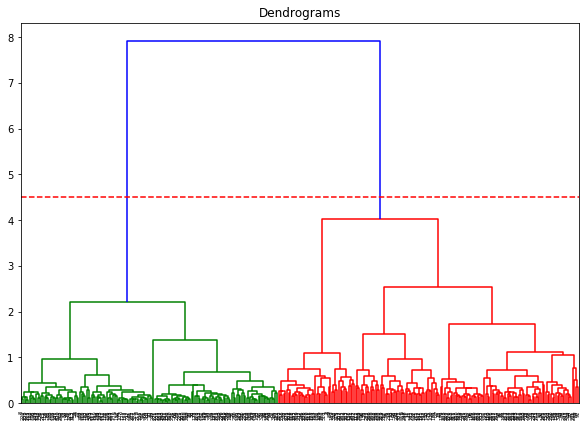

In [7]:
# draw the dendrogram to help us decide the number of clusters for this particular problem

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=4.5, color='r', linestyle='--')

The x-axis contains the samples and y-axis represents the distance between these samples. 

Find the vertical line with maximum distance (is the blue line) and set the threshold in such a way that it cuts the tallest vertical line and cut the dendrogram  The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

WHAT DOES THRESHOLD MEAN?

threshold :  threshold is the maximum number of data points a sub-cluster in the leaf node of the CF tree can hold.

See how many points the line drawn above cuts at, and that will be the number of clusters.


In [8]:
# Cluster!
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

AHC_cluster_labels = cluster.fit_predict(data_scaled)
data_scaled['cluster'] = AHC_cluster_labels

In [9]:
data_scaled

age    gender  monthly_income  instituition    region  location  \
0    0.023762  0.000000        0.095050      0.403961  0.047525  0.902972   
1    0.053376  0.000000        0.213504      0.907393  0.213504  0.160128   
2    0.055902  0.055902        0.223607      0.894427  0.223607  0.167705   
3    0.000000  0.000000        0.114379      0.486111  0.028595  0.857843   
4    0.037878  0.000000        0.189389      0.568166  0.037878  0.795432   
..        ...       ...             ...           ...       ...       ...   
329  0.053074  0.000000        0.212298      0.902266  0.000000  0.318447   
330  0.000000  0.000000        0.204465      0.695182  0.000000  0.654289   
331  0.065653  0.065653        0.131306      0.590879  0.196960  0.722185   
332  0.031639  0.000000        0.000000      0.284747  0.031639  0.949158   
333  0.000000  0.000000        0.402015      0.804030  0.301511  0.000000   

     type_of_student  type_of_employment  convenient_rental_car  \
0                0.0            0.047525               0.000000   
1                0.0            0.053376               0.053376   
2                0.0            0.111803               0.000000   
3                0.0            0.057190               0.000000   
4                0.0            0.075755               0.000000   
..               ...                 ...                    ...   
329              0.0            0.106149               0.000000   
330              0.0            0.081786               0.000000   
331              0.0            0.131306               0.131306   
332              0.0            0.031639               0.000000   
333              0.0            0.201008               0.000000   

     difficulties_rental_car  ...  reason_taxi_comfort_of_privacy  \
0                   0.000000  ...                        0.000000   
1                   0.053376  ...                        0.000000   
2                   0.000000  ...                        0.000000   
3                   0.000000  ...                        0.000000   
4                   0.000000  ...                        0.000000   
..                       ...  ...                             ...   
329                 0.000000  ...                        0.000000   
330                 0.000000  ...                        0.040893   
331                 0.065653  ...                        0.000000   
332                 0.000000  ...                        0.000000   
333                 0.000000  ...                        0.000000   

     reason_ride_hailing_ comfort_of_privacy  reason_ride_hailing_promotion  \
0                                   0.000000                       0.023762   
1                                   0.000000                       0.053376   
2                                   0.000000                       0.055902   
3                                   0.000000                       0.028595   
4                                   0.000000                       0.000000   
..                                       ...                            ...   
329                                 0.000000                       0.053074   
330                                 0.040893                       0.040893   
331                                 0.000000                       0.065653   
332                                 0.000000                       0.031639   
333                                 0.000000                       0.000000   

     reason_taxi_promotion  customer_service_taxi  \
0                 0.023762               0.000000   
1                 0.053376               0.053376   
2                 0.000000               0.055902   
3                 0.028595               0.057190   
4                 0.000000               0.000000   
..                     ...                    ...   
329               0.053074               0.000000   
330               0.000000               0.000000   
331               0.06565

In [10]:
# Silhouette Coefficient
# Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense.
#print("Silhouette Coefficient for AHC: " + str(metrics.silhouette_score(perception, AHC_cluster_labels)))
print("Silhouette Coefficient for AHC: " + str(metrics.silhouette_score(data_scaled, AHC_cluster_labels)))

print("")

# Calinski Harabaz Index
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster. 
# (AKA the higher the better)
#print("CH Score for AHC: " + str(metrics.calinski_harabasz_score(perception, AHC_cluster_labels)))
print("CH Score for AHC: " + str(metrics.calinski_harabasz_score(data_scaled, AHC_cluster_labels)))

print("")

# Davies-Bouldin Index
# The minimum score is zero, with lower values indicating better clustering
#print("Davies-Bouldin Index for AHC: " + str(metrics.davies_bouldin_score(perception, AHC_cluster_labels)))
print("Davies-Bouldin Index for AHC: " + str(metrics.davies_bouldin_score(data_scaled, AHC_cluster_labels)))

Silhouette Coefficient for AHC: 0.6837267330069038

CH Score for AHC: 1198.4738972520595

Davies-Bouldin Index for AHC: 0.462419903496877


In [11]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
AHC_cluster_labels = cluster.fit_predict(data_scaled)
data_scaled['cluster'] = AHC_cluster_labels

# Silhouette Coefficient
# Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense.
#print("Silhouette Coefficient for AHC: " + str(metrics.silhouette_score(perception, AHC_cluster_labels)))
print("Silhouette Coefficient for AHC: " + str(metrics.silhouette_score(data_scaled, AHC_cluster_labels)))

print("")

# Calinski Harabaz Index
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster. 
# (AKA the higher the better)
#print("CH Score for AHC: " + str(metrics.calinski_harabasz_score(perception, AHC_cluster_labels)))
print("CH Score for AHC: " + str(metrics.calinski_harabasz_score(data_scaled, AHC_cluster_labels)))

print("")

# Davies-Bouldin Index
# The minimum score is zero, with lower values indicating better clustering
#print("Davies-Bouldin Index for AHC: " + str(metrics.davies_bouldin_score(perception, AHC_cluster_labels)))
print("Davies-Bouldin Index for AHC: " + str(metrics.davies_bouldin_score(data_scaled, AHC_cluster_labels)))

Silhouette Coefficient for AHC: 0.7138746400463625

CH Score for AHC: 1374.9847275907634

Davies-Bouldin Index for AHC: 0.4000661968948361


Tried 3 clusters, evaluation score is better hence proceeded with 3 clusters

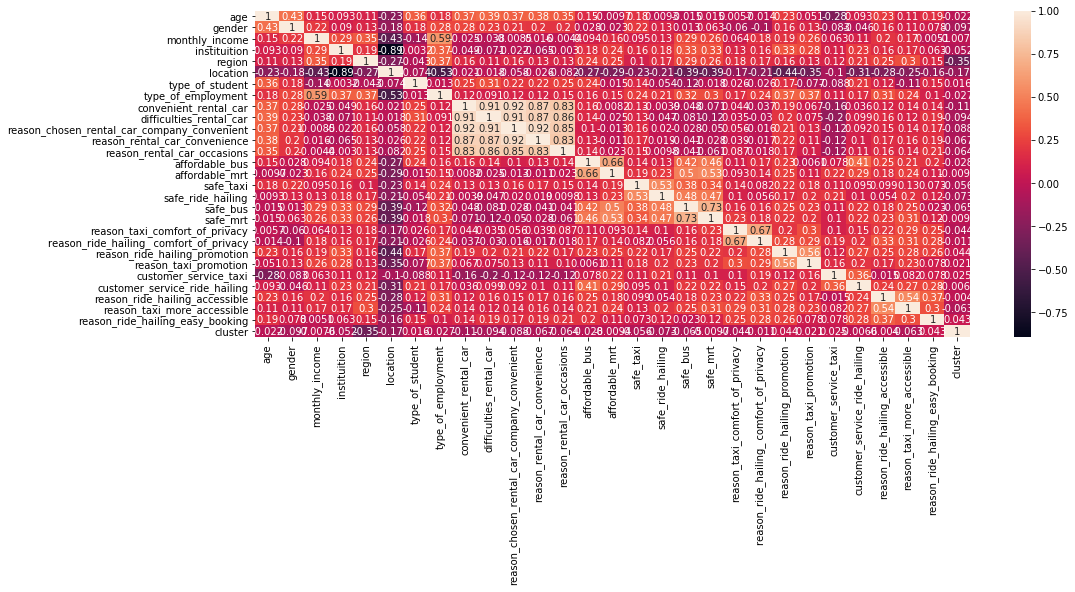

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_scaled.corr(), annot=True)

In [13]:
data_scaled.groupby('cluster').count()

age  gender  monthly_income  instituition  region  location  \
cluster                                                                
0        134     134             134           134     134       134   
1        154     154             154           154     154       154   
2         46      46              46            46      46        46   

         type_of_student  type_of_employment  convenient_rental_car  \
cluster                                                               
0                    134                 134                    134   
1                    154                 154                    154   
2                     46                  46                     46   

         difficulties_rental_car  ...  safe_mrt  \
cluster                           ...             
0                            134  ...       134   
1                            154  ...       154   
2                             46  ...        46   

         reason_taxi_comfort_of_privacy  \
cluster                                   
0                                   134   
1                                   154   
2                                    46   

         reason_ride_hailing_ comfort_of_privacy  \
cluster                                            
0                                            134   
1                                            154   
2                                             46   

         reason_ride_hailing_promotion  reason_taxi_promotion  \
cluster                                                         
0                                  134                    134   
1                                  154                    154   
2                                   46                     46   

         customer_service_taxi  customer_service_ride_hailing  \
cluster                                                         
0                          134                            134   
1                          154                            154   
2                           46                             46   

         reason_ride_hailing_accessible  reason_taxi_more_accessible  \
cluster                                                                
0                                   134                          134   
1                                   154                          154   
2                                    46                           46   

         reason_ride_hailing_easy_booking  
cluster                                    
0                                     134  
1                                     154  
2                                      46  

[3 rows x 28 columns]

In [14]:
data_scaled.columns

Index(['age', 'gender', 'monthly_income', 'instituition', 'region', 'location',
       'type_of_student', 'type_of_employment', 'convenient_rental_car',
       'difficulties_rental_car',
       'reason_chosen_rental_car_company_convenient',
       'reason_rental_car_convenience', 'reason_rental_car_occasions',
       'affordable_bus', 'affordable_mrt', 'safe_taxi', 'safe_ride_hailing',
       'safe_bus', 'safe_mrt', 'reason_taxi_comfort_of_privacy',
       'reason_ride_hailing_ comfort_of_privacy',
       'reason_ride_hailing_promotion', 'reason_taxi_promotion',
       'customer_service_taxi', 'customer_service_ride_hailing',
       'reason_ride_hailing_accessible', 'reason_taxi_more_accessible',
       'reason_ride_hailing_easy_booking', 'cluster'],
      dtype='object')

In [15]:
#FOR LOOP SCATTER PLOT LIKE DATA LABELS ABOVE!

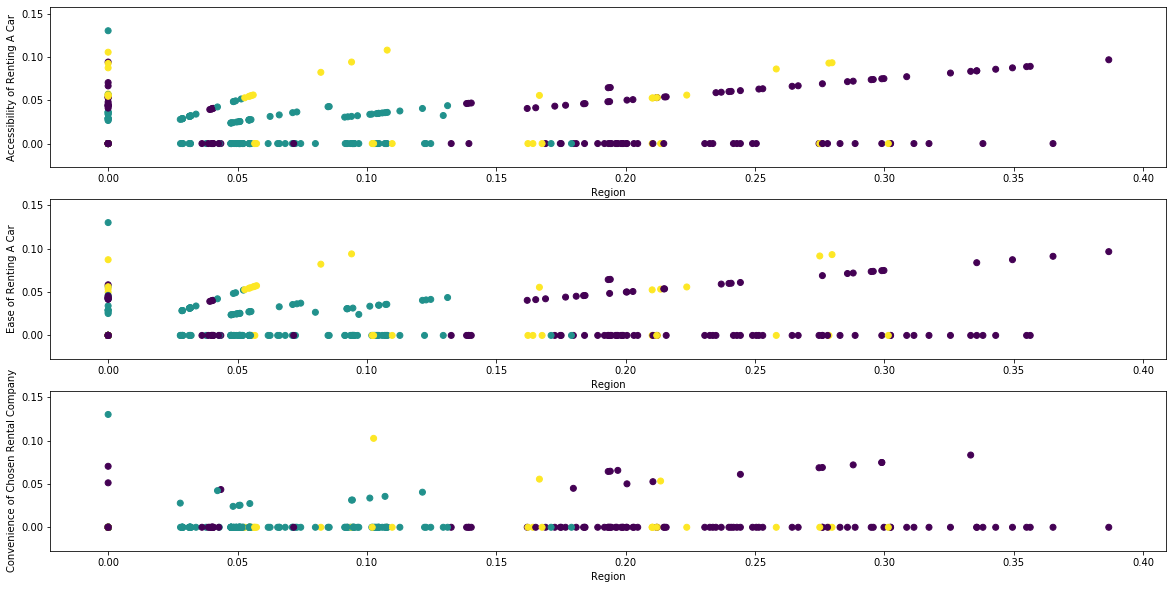

In [16]:
#Plot the scatter plot to visualise the clusters...?
# plt.figure(figsize=(10, 7))  
# plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 


fig, ax = plt.subplots(3, figsize=(20, 10))
ax[0].scatter(x = data_scaled['region'], y = data_scaled['reason_ride_hailing_accessible'], c=data_scaled['cluster'] )
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Accessibility of Renting A Car")

ax[1].scatter(x = data_scaled['region'], y = data_scaled['reason_ride_hailing_easy_booking'], c=data_scaled['cluster'])
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Ease of Renting A Car")


ax[2].scatter(x = data_scaled['region'], y = data_scaled['reason_chosen_rental_car_company_convenient'], c=data_scaled['cluster'])
ax[2].set_xlabel("Region")
ax[2].set_ylabel("Convenience of Chosen Rental Company")

plt.show()

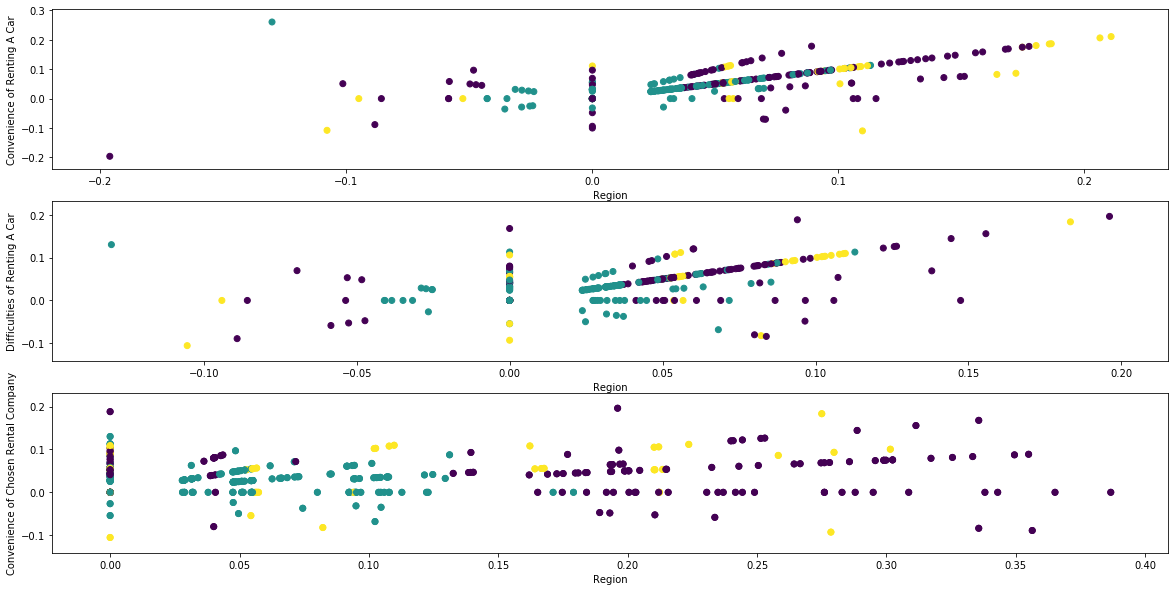

In [17]:
fig, ax = plt.subplots(3, figsize=(20, 10))
ax[0].scatter(x = data_scaled['affordable_mrt'], y = data_scaled['affordable_bus'], c=data_scaled['cluster'] )
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Convenience of Renting A Car")

ax[1].scatter(x = data_scaled['safe_ride_hailing'], y = data_scaled['safe_taxi'], c=data_scaled['cluster'])
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Difficulties of Renting A Car")

ax[2].scatter(x = data_scaled['region'], y = data_scaled['safe_taxi'], c=data_scaled['cluster'])
ax[2].set_xlabel("Region")
ax[2].set_ylabel("Convenience of Chosen Rental Company")

ax[2].scatter(x = data_scaled['region'], y = data_scaled['safe_taxi'], c=data_scaled['cluster'])
ax[2].set_xlabel("Region")
ax[2].set_ylabel("Convenience of Chosen Rental Company")

plt.show()

In [18]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data_scaled.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data_scaled[data_scaled.cluster == C]['affordable_bus'],
                                y = data_scaled[data_scaled.cluster == C]['safe_bus'],
                                z = data_scaled[data_scaled.cluster == C]['monthly_income'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Affordable', titlefont_color = 'black'),
                                yaxis=dict(title = 'Safety', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monthly Income', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [19]:
# import plotly.graph_objects as go
from plotly import graph_objs as go

PLOT = go.Figure()

for C in list(data_scaled.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data_scaled[data_scaled.cluster == C]['reason_ride_hailing_promotion'],
                                y = data_scaled[data_scaled.cluster == C]['reason_ride_hailing_ comfort_of_privacy'],
                                z = data_scaled[data_scaled.cluster == C]['region'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Promotion', titlefont_color = 'black'),
                                yaxis=dict(title = 'Comfort', titlefont_color = 'black'),
                                zaxis=dict(title = 'Region', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [20]:
PLOT = go.Figure()

for C in list(data_scaled.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data_scaled[data_scaled.cluster == C]['safe_taxi'],
                                y = data_scaled[data_scaled.cluster == C]['reason_taxi_comfort_of_privacy'],
                                z = data_scaled[data_scaled.cluster == C]['gender'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Safety', titlefont_color = 'black'),
                                yaxis=dict(title = 'Comfort', titlefont_color = 'black'),
                                zaxis=dict(title = 'Gender', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# Interpreting Clustering Results

In [21]:
#all_features = perception.columns
#data = perception
#data['cluster'] = AHC_cluster_labels

#for col in all_features:
#    plt.subplots(figsize = (15,5))
#    sns.countplot(x=data[col], order=data[col].value_counts().index, hue= data['cluster'])
#    plt.show()
    

In [22]:
all_features = perception.columns
all_features

Index(['age', 'gender', 'monthly_income', 'instituition', 'region', 'location',
       'type_of_student', 'type_of_employment', 'convenient_rental_car',
       'difficulties_rental_car',
       'reason_chosen_rental_car_company_convenient',
       'reason_rental_car_convenience', 'reason_rental_car_occasions',
       'affordable_bus', 'affordable_mrt', 'safe_taxi', 'safe_ride_hailing',
       'safe_bus', 'safe_mrt', 'reason_taxi_comfort_of_privacy',
       'reason_ride_hailing_ comfort_of_privacy',
       'reason_ride_hailing_promotion', 'reason_taxi_promotion',
       'customer_service_taxi', 'customer_service_ride_hailing',
       'reason_ride_hailing_accessible', 'reason_taxi_more_accessible',
       'reason_ride_hailing_easy_booking'],
      dtype='object')

In [23]:
data = original_dataset_labels[all_features]
data['cluster'] = AHC_cluster_labels
data

age  gender       monthly_income instituition      region  \
0    22 - 25  Female           Below $500          SMU       North   
1    22 - 25  Female           Below $500          SMU        West   
2    22 - 25    Male           Below $500          SIT        West   
3    18 - 21  Female           Below $500          SMU        East   
4    22 - 25  Female    Prefer not to say          SIM        East   
..       ...     ...                  ...          ...         ...   
329  22 - 25  Female           Below $500          SMU     Central   
330  18 - 21  Female    Prefer not to say          SMU     Central   
331  22 - 25    Male        $501 - $1,000          NUS  North-East   
332  22 - 25  Female  $1,001 - $2,000\r\n          NUS        East   
333  18 - 21  Female           Below $500          NTU  North-East   

              location    type_of_student  type_of_employment  \
0               Yishun  Full-time Student        Not employed   
1          Bukit Batok  Full-time Student  Employed Part-time   
2          Bukit Batok  Full-time Student        Not employed   
3             Tampines  Full-time Student        Not employed   
4    Prefer not to say  Full-time Student        Not employed   
..                 ...                ...                 ...   
329        Bukit Timah  Full-time Student        Not employed   
330      Marine Parade  Full-time Student        Not employed   
331            Hougang  Full-time Student        Not employed   
332           Tampines  Full-time Student  Employed Part-time   
333         Ang Mo Kio  Full-time Student        Not employed   

    convenient_rental_car difficulties_rental_car  ...  \
0    Have not rent before    Have not rent before  ...   
1                      No                      No  ...   
2    Have not rent before    Have not rent before  ...   
3    Have not rent before    Have not rent before  ...   
4    Have not rent before    Have not rent before  ...   
..                    ...                     ...  ...   
329  Have not rent before    Have not rent before  ...   
330  Have not rent before    Have not rent before  ...   
331                   Yes                      No  ...   
332  Have not rent before    Have not rent before  ...   
333  Have not rent before    Have not rent before  ...   

     reason_taxi_comfort_of_privacy  reason_ride_hailing_ comfort_of_privacy  \
0                                 0                                        0   
1                                 0                                        0   
2                                 0                                        0   
3                                 0                                        0   
4                                 0                                        0   
..                              ...                                      ...   
329                               0                                        0   
330                               1                                        1   
331                               0                                        0   
332                               0                                        0   
333                               0                                        0   

     reason_ride_hailing_promotion reason_taxi_promotion  \
0                                1                     1   
1                                1                     1   
2                                1                     0   
3                                1                     1   
4                                0                     0   
..                             ...                   ...   
329                              1                     1   
330                              1                     0   
331                              1                     1   
332                              1                     0   
333                              0                     0   

    cust

In [24]:
data['cluster'].replace(to_replace = [0,1,2], value =['A', 'B', 'C'], inplace=True)
data.head()
#data.to_csv('agg_clustering_perception.csv')

age  gender     monthly_income instituition region           location  \
0  22 - 25  Female         Below $500          SMU  North             Yishun   
1  22 - 25  Female         Below $500          SMU   West        Bukit Batok   
2  22 - 25    Male         Below $500          SIT   West        Bukit Batok   
3  18 - 21  Female         Below $500          SMU   East           Tampines   
4  22 - 25  Female  Prefer not to say          SIM   East  Prefer not to say   

     type_of_student  type_of_employment convenient_rental_car  \
0  Full-time Student        Not employed  Have not rent before   
1  Full-time Student  Employed Part-time                    No   
2  Full-time Student        Not employed  Have not rent before   
3  Full-time Student        Not employed  Have not rent before   
4  Full-time Student        Not employed  Have not rent before   

  difficulties_rental_car  ...  reason_taxi_comfort_of_privacy  \
0    Have not rent before  ...                               0   
1                      No  ...                               0   
2    Have not rent before  ...                               0   
3    Have not rent before  ...                               0   
4    Have not rent before  ...                               0   

   reason_ride_hailing_ comfort_of_privacy  reason_ride_hailing_promotion  \
0                                        0                              1   
1                                        0                              1   
2                                        0                              1   
3                                        0                              1   
4                                        0                              0   

  reason_taxi_promotion customer_service_taxi customer_service_ride_hailing  \
0                     1               Neutral                       Neutral   
1                     1                 Agree            Strongly Agree\r\n   
2                     0                 Agree            Strongly Agree\r\n   
3                     1        Strongly Agree                         Agree   
4                     0               Neutral                       Neutral   

  reason_ride_hailing_accessible reason_taxi_more_accessible  \
0                              1                           1   
1                              0                           0   
2                              1                           0   
3                              0                           1   
4                              0                           0   

  reason_ride_hailing_easy_booking  cluster  
0                                0        B  
1                                1        C  
2                                1        C  
3                                0        B  
4                                0        B  

[5 rows x 29 columns]

In [25]:
data.groupby('cluster').describe()

reason_chosen_rental_car_company_convenient                           \
                                              count      mean       std  min   
cluster                                                                        
A                                             134.0  0.119403  0.325479  0.0   
B                                             154.0  0.077922  0.268923  0.0   
C                                              46.0  0.065217  0.249637  0.0   

                            reason_rental_car_convenience            ...  \
         25%  50%  75%  max                         count      mean  ...   
cluster                                                              ...   
A        0.0  0.0  0.0  1.0                         134.0  0.089552  ...   
B        0.0  0.0  0.0  1.0                         154.0  0.090909  ...   
C        0.0  0.0  0.0  1.0                          46.0  0.043478  ...   

        reason_taxi_more_accessible      reason_ride_hailing_easy_booking  \
                                75%  max                            count   
cluster                                                                     
A                               1.0  1.0                            134.0   
B                               1.0  1.0                            154.0   
C                               1.0  1.0                             46.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
A        0.313433  0.465629  0.0  0.0  0.0  1.0  1.0  
B        0.383117  0.487733  0.0  0.0  0.0  1.0  1.0  
C        0.391304  0.493435  0.0  0.0  0.0  1.0  1.0  

[3 rows x 80 columns]

## Convenience 

Insights for the 3 different type of clustering:

Cluster 0/1/2: Most of those in cluster find it convenient to rent a car and face no difficulties renting before but convenience is not a factor for them when using their preferred rental car companies and most did not choose convenience as a factor when they want to rent a car


In [26]:
df_convenience = data[["convenient_rental_car", "difficulties_rental_car", "reason_chosen_rental_car_company_convenient", 'reason_rental_car_convenience', 'reason_rental_car_occasions', 'cluster']]
all_features = df_convenience.drop('cluster', axis=1).columns

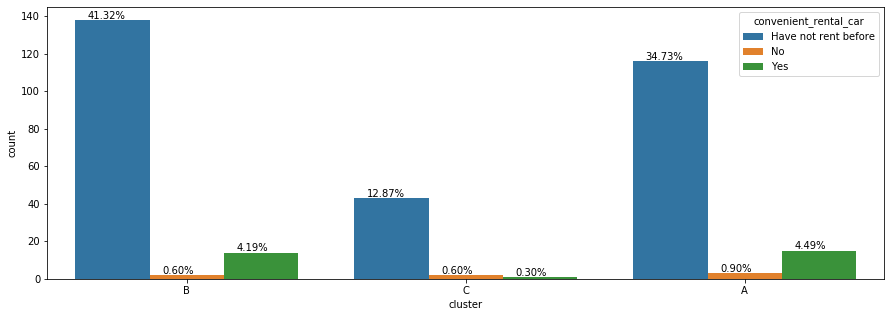

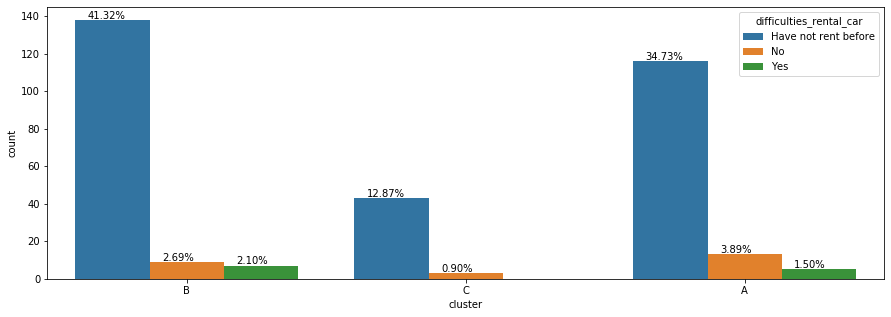

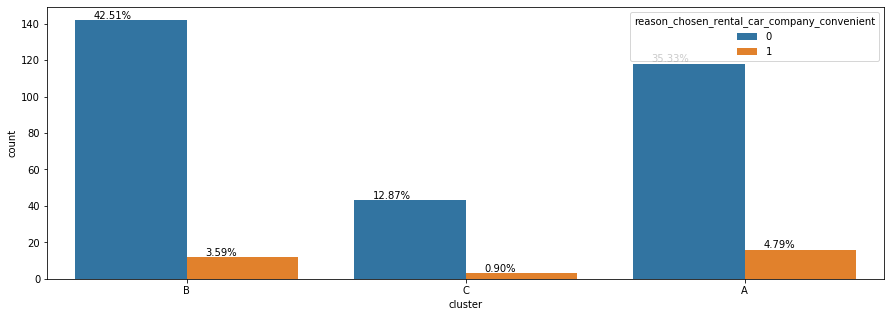

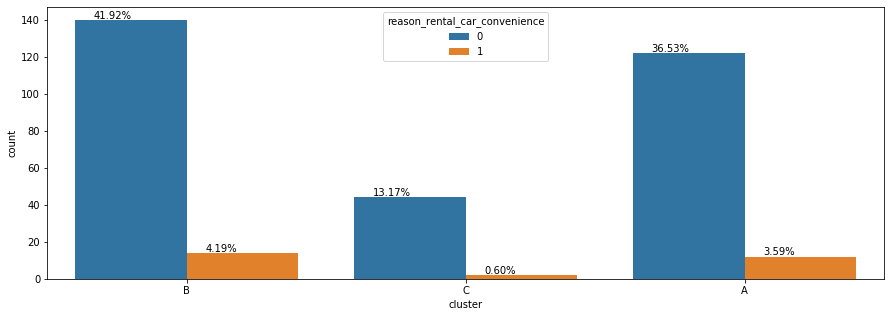

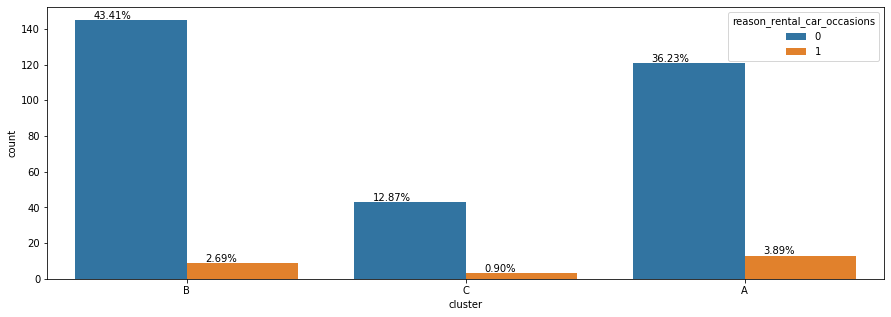

In [27]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_convenience)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_convenience)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [28]:
df_g = df_convenience.groupby(['convenient_rental_car', 'cluster']).size().reset_index()
df_g['percentage'] = df_convenience.groupby(['convenient_rental_car', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['convenient_rental_car', 'cluster', 'Counts', 'Percentage']
px.bar(df_g, x='convenient_rental_car', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [29]:
df_g = df_convenience.groupby(['reason_rental_car_occasions', 'cluster']).size().reset_index()
df_g['percentage'] = df_convenience.groupby(['reason_rental_car_occasions', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_rental_car_occasions', 'cluster', 'Counts', 'Percentage']
px.bar(df_g, x='reason_rental_car_occasions', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [30]:
df_g = df_convenience.groupby(['reason_rental_car_convenience', 'cluster']).size().reset_index()
df_g['percentage'] = df_convenience.groupby(['reason_rental_car_convenience', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_rental_car_convenience', 'cluster', 'Counts', 'Percentage']
px.bar(df_g, x='reason_rental_car_convenience', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

## Affordability

Insights for the 3 different type of clustering:

Cluster 0: Most of those in cluster agree that the mode of transport is affordable for them

Cluster 1: Most of those in cluster strongly agree that the mode of transport is affordable for them

Cluster 2: Most of those in cluster strongly agree that the mode of transport is affordable for them

In [31]:
df_affordability = data[['affordable_bus', 'affordable_mrt','cluster']]
all_features = df_affordability.drop('cluster', axis=1).columns

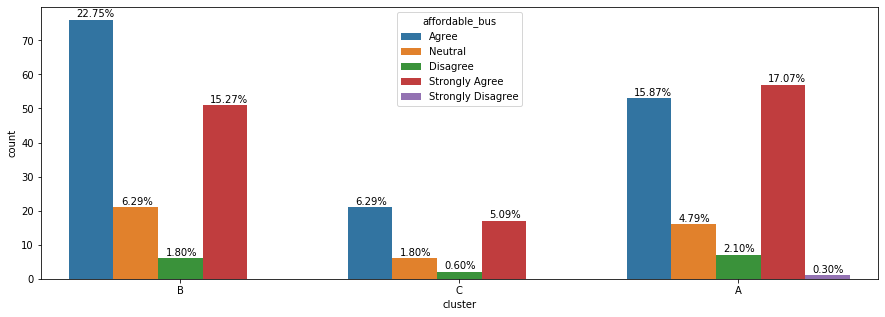

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



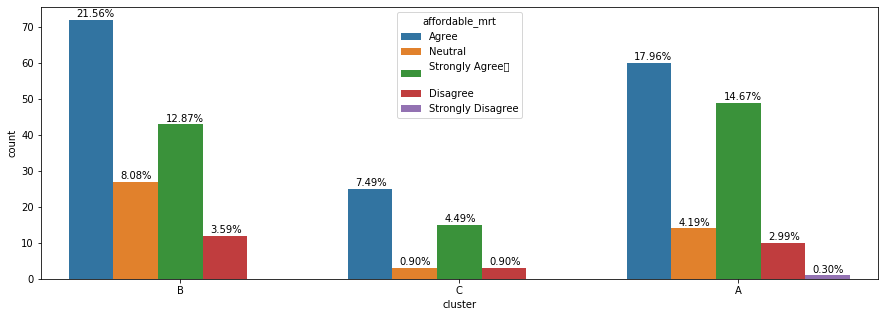

In [32]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_affordability)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_affordability)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [33]:
df_g = df_affordability.groupby(['affordable_bus', 'cluster']).size().reset_index()
df_g['percentage'] = df_affordability.groupby(['affordable_bus', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['affordable_bus', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='affordable_bus', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [34]:
df_g = df_affordability.groupby(['affordable_mrt', 'cluster']).size().reset_index()
df_g['percentage'] = df_affordability.groupby(['affordable_mrt', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['affordable_mrt', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='affordable_mrt', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

## Safety

Insights for the 3 different type of clustering:

Cluster 0: Most of those in cluster agree that they feel safe when taking the different mode of transportations

Cluster 1: Most of those in cluster feels netural about safety when taking taxi/ridehailing while most agree that they feel safe when taking bus/mrt. //  or rather agree for all modes too

Cluster 2: Most of those in cluster strongly agree that they feel safe when taking the different mode of transportations //  or rather agree for all modes too

In [35]:
df_safety = data[['safe_taxi', 'safe_ride_hailing', 'safe_bus', 'safe_mrt','cluster']]
all_features = df_safety.drop('cluster', axis=1).columns

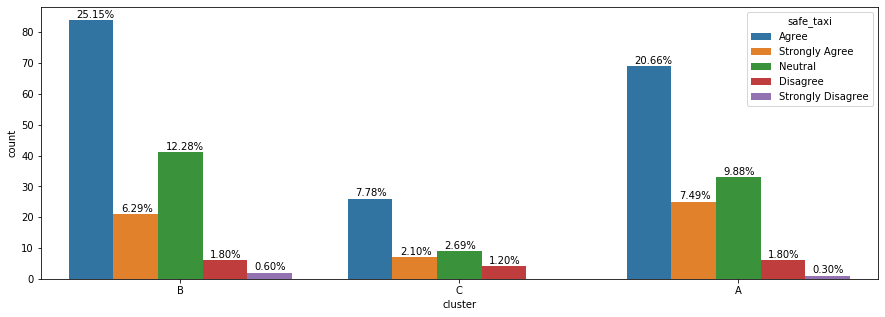

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



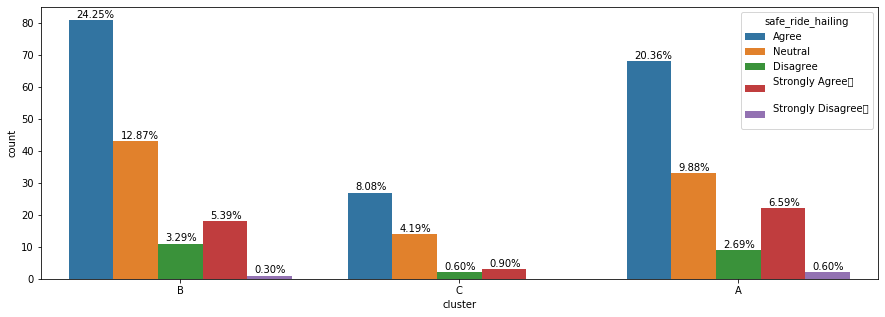

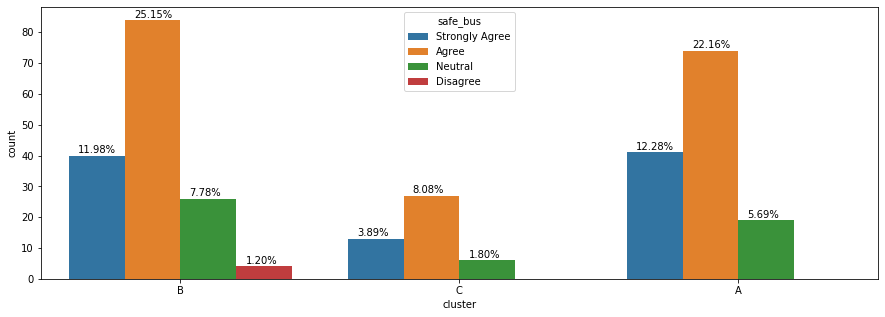

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



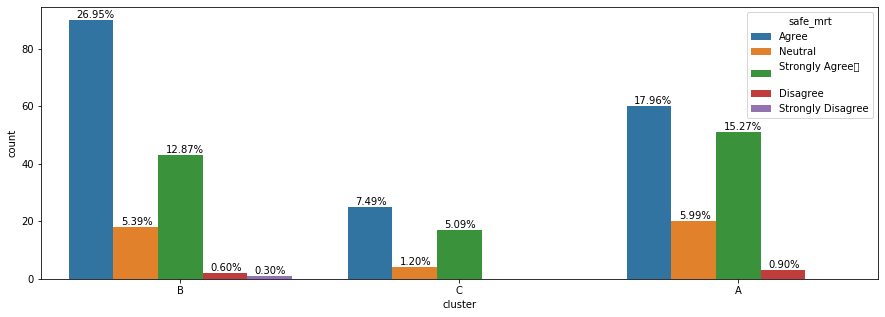

In [36]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_safety)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_safety)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [37]:
df_g = df_safety.groupby(['safe_taxi', 'cluster']).size().reset_index()
df_g['percentage'] = df_safety.groupby(['safe_taxi', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['safe_taxi', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='safe_taxi', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [38]:
df_g = df_safety.groupby(['safe_ride_hailing', 'cluster']).size().reset_index()
df_g['percentage'] = df_safety.groupby(['safe_ride_hailing', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['safe_ride_hailing', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='safe_ride_hailing', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [39]:
df_g = df_safety.groupby(['safe_bus', 'cluster']).size().reset_index()
df_g['percentage'] = df_safety.groupby(['safe_bus', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['safe_bus', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='safe_bus', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [40]:
df_g = df_safety.groupby(['safe_mrt', 'cluster']).size().reset_index()
df_g['percentage'] = df_safety.groupby(['safe_mrt', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['safe_mrt', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='safe_mrt', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

## Comfort

Insights for the 3 different type of clustering:

Cluster 0 & 1 & 2: Most people do not consider comfort of privacy when taking a taxi/ride hailing services


In [41]:
df_comfort = data[['reason_taxi_comfort_of_privacy', 'reason_ride_hailing_ comfort_of_privacy','cluster']]
all_features = df_comfort.drop('cluster', axis=1).columns

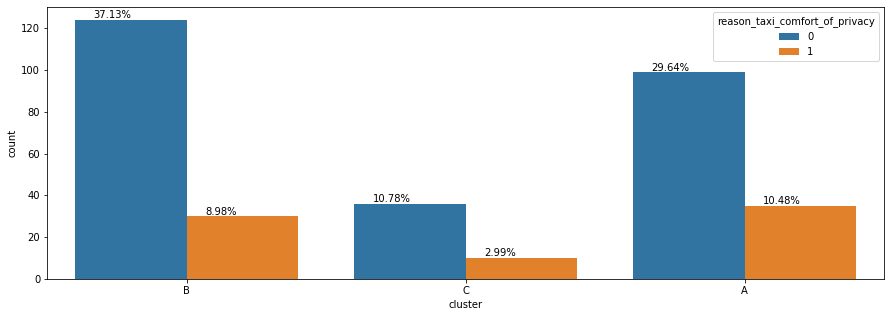

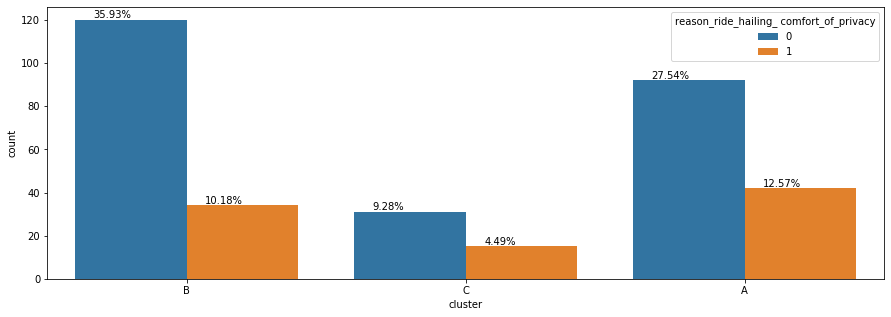

In [42]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_comfort)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_comfort)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [43]:
df_g = df_comfort.groupby(['reason_taxi_comfort_of_privacy', 'cluster']).size().reset_index()
df_g['percentage'] = df_comfort.groupby(['reason_taxi_comfort_of_privacy', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_taxi_comfort_of_privacy', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_taxi_comfort_of_privacy', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [44]:
df_g = df_comfort.groupby(['reason_ride_hailing_ comfort_of_privacy', 'cluster']).size().reset_index()
df_g['percentage'] = df_comfort.groupby(['reason_ride_hailing_ comfort_of_privacy', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_ride_hailing_ comfort_of_privacy', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_ride_hailing_ comfort_of_privacy', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

## Promotion

Insights for the 3 different type of clustering:

Cluster 0 & 1: More people rides the taxi/ride hailing when there is promotion

Cluster 2: Will ride when there is promotion for ridehailing & more people in the cluster who do not consider promotion as a factor when they take the taxi 

// or rather all clusters ride taxi/ride hailing when there is a promotion (but the make up of those who do and don't are almost similar for all three clusters)

In [45]:
df_promotion = data[['reason_ride_hailing_promotion', 'reason_taxi_promotion','cluster']]
all_features = df_promotion.drop('cluster', axis=1).columns

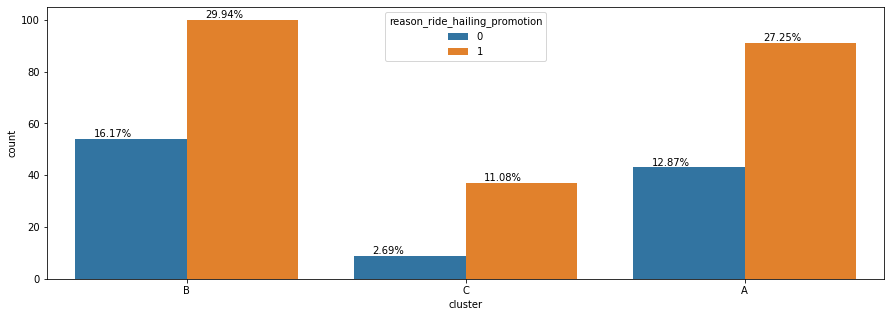

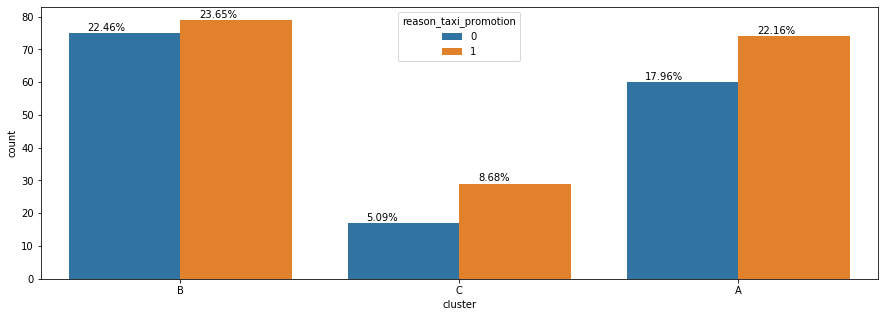

In [46]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_promotion)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_promotion)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [47]:
df_g = df_promotion.groupby(['reason_ride_hailing_promotion', 'cluster']).size().reset_index()
df_g['percentage'] = df_promotion.groupby(['reason_ride_hailing_promotion', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_ride_hailing_promotion', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_ride_hailing_promotion', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [48]:
df_g = df_promotion.groupby(['reason_taxi_promotion', 'cluster']).size().reset_index()
df_g['percentage'] = df_promotion.groupby(['reason_taxi_promotion', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_taxi_promotion', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_taxi_promotion', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

## Customer service

Insights:

Cluster 0: More people agree that the customer service of ride hailing & taxi is important

Cluster 1: More people feels neutral that the customer service of ride hailing & taxi is important // tbh is agree too....

Cluster 2: More people feels agree that the customer service of ride hailing & taxi is important // or rather it is about the same number for those who feel neutral, strongly agree and agree

From the above, it is obvious that cluster "1" is the biggest in size, and that 

those who have selected "Strongly Agree" for customer service ride hailing are almost even split amongst the 3 clusters, with cluster 2 having about double the number of people who have selected "Agree" and "Neutral" in the other 2 clusters.

INDICATING THAT : Cluster 0 is made up of majority of the people who have indicated "Agree" on customer service in ride hailing and taxi

In [49]:
df_cs = data[['customer_service_taxi','customer_service_ride_hailing','cluster']]
all_features = df_cs.drop('cluster', axis=1).columns

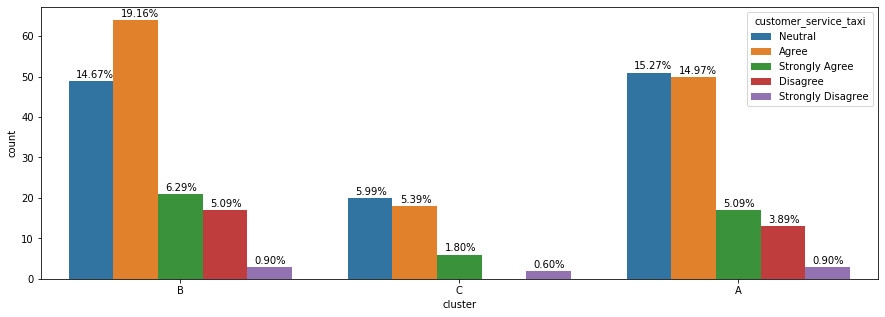

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



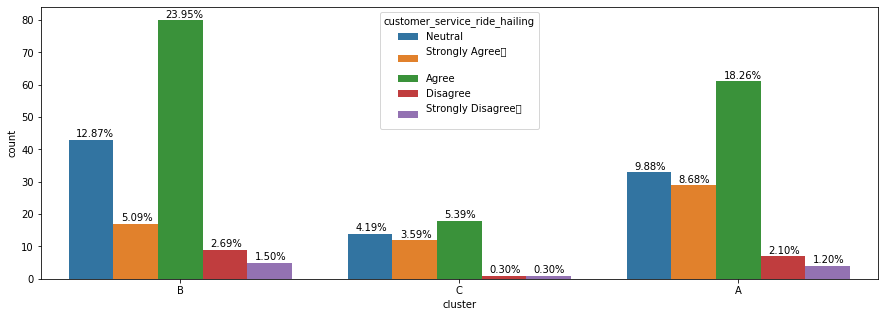

In [50]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_cs)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_cs)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [51]:
df_g = df_cs.groupby(['customer_service_taxi', 'cluster']).size().reset_index()
df_g['percentage'] = df_cs.groupby(['customer_service_taxi', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['customer_service_taxi', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='customer_service_taxi', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [52]:
df_g = df_cs.groupby(['customer_service_ride_hailing', 'cluster']).size().reset_index()
df_g['percentage'] = df_cs.groupby(['customer_service_ride_hailing', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['customer_service_ride_hailing', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='customer_service_ride_hailing', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

Insights:

Cluster 0: More people agree that the customer service of ride hailing & taxi is important 

Cluster 1: More people feels neutral that the customer service of ride hailing & taxi is important 

Cluster 2:  More people feels neutral/agree that the customer service of ride hailing & taxi is important 


## Accessibility

For all 3 clusters identified, majority of them seem to not take taxi because they think they are more accessible and that ride hailing is easy to book. 
Except for cluster 2, there are slightly more people who are take ride hailing because it is more accessible.

In [53]:
df_accessible = data[['reason_ride_hailing_accessible', 'reason_taxi_more_accessible', 'reason_ride_hailing_easy_booking','cluster']]
all_features = df_accessible.drop('cluster', axis=1).columns

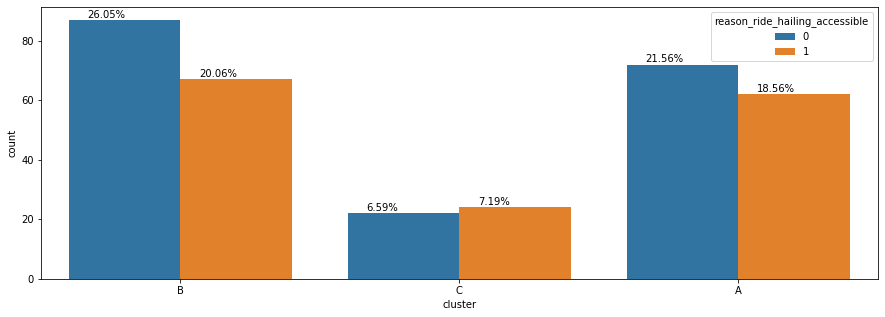

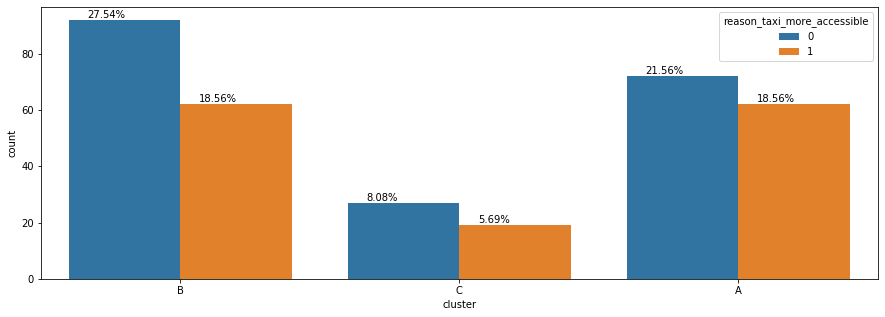

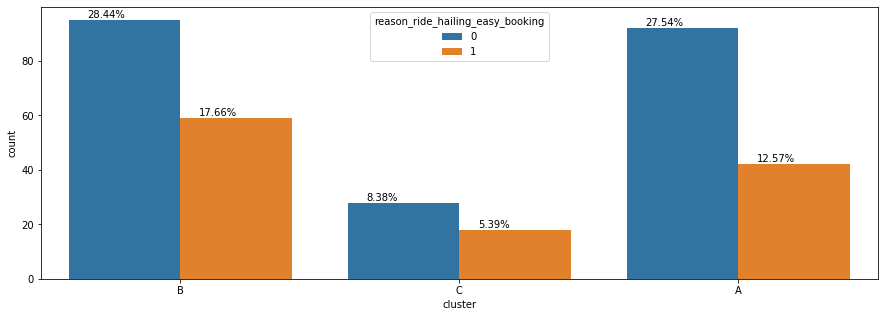

In [54]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_accessible)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_accessible)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()

In [55]:
df_g = df_accessible.groupby(['reason_ride_hailing_accessible', 'cluster']).size().reset_index()
df_g['percentage'] = df_accessible.groupby(['reason_ride_hailing_accessible', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_ride_hailing_accessible', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_ride_hailing_accessible', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [56]:
df_g = df_accessible.groupby(['reason_taxi_more_accessible', 'cluster']).size().reset_index()
df_g['percentage'] = df_accessible.groupby(['reason_taxi_more_accessible', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_taxi_more_accessible', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_taxi_more_accessible', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [57]:
df_g = df_accessible.groupby(['reason_ride_hailing_easy_booking', 'cluster']).size().reset_index()
df_g['percentage'] = df_accessible.groupby(['reason_ride_hailing_easy_booking', 'cluster']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['reason_ride_hailing_easy_booking', 'cluster', 'Counts', 'Percentage']
fig = px.bar(df_g, x='reason_ride_hailing_easy_booking', y=['Counts'], color='cluster', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

# Demographics


In [58]:
df_demographics = data[['age','gender','monthly_income','instituition','region','location','cluster']]
all_features = df_demographics.drop('cluster', axis=1).columns

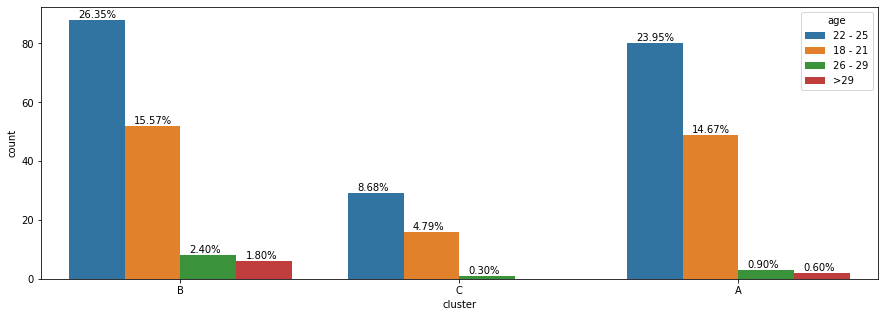

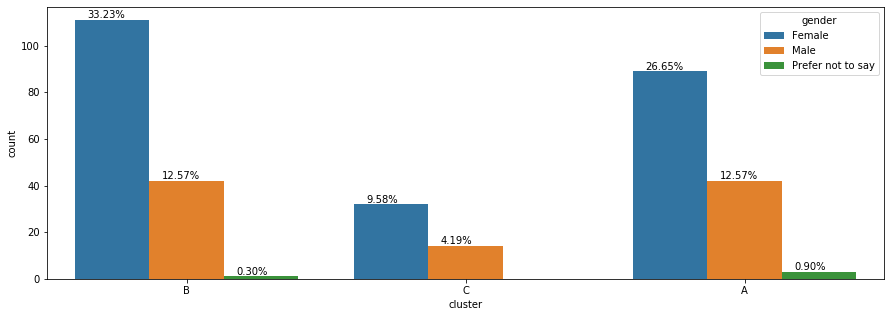

Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.


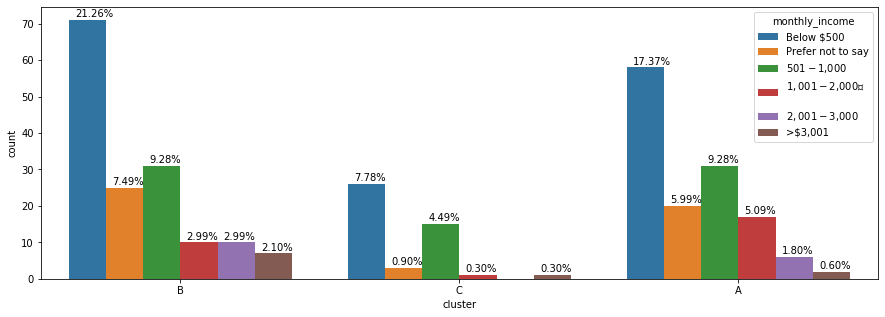

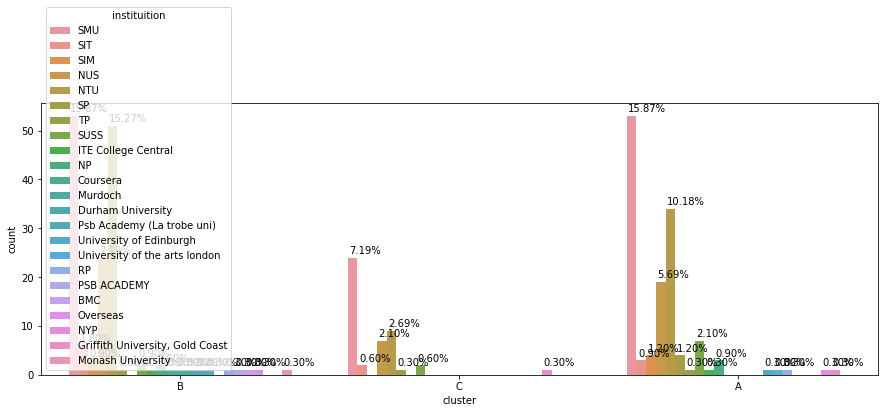

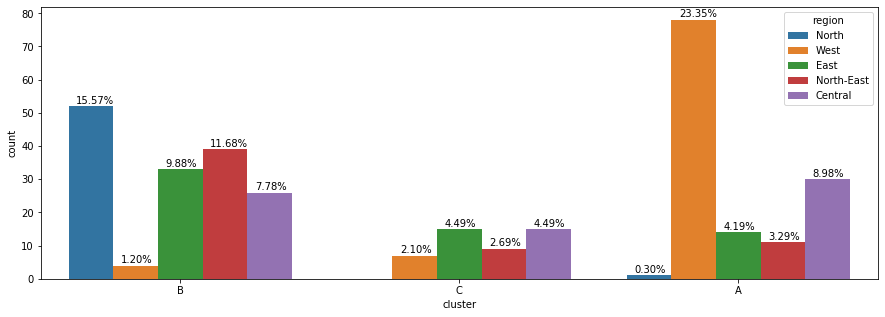

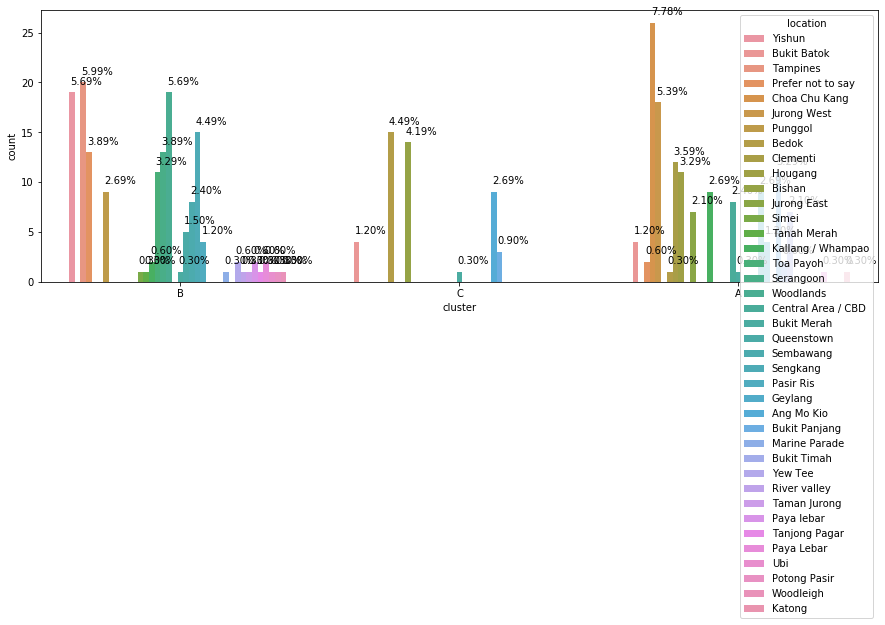

In [59]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = df_demographics)
     # # trying to plot out the percentage to have a more accurate comparison
    total = len(df_demographics)
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total) #percentage = count of each bar / total no. of rows
            y= p.get_y() + p.get_height() + 0.8
            x = p.get_x() + p.get_width()/6
            ax.annotate(percentage, (x, y))
    plt.show()